In [1]:
pip install -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 1.0.1
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: C:\Users\akinw\anaconda3\envs\Andela\Lib\site-packages
Requires: google-generativeai, langchain-core
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [5]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


Integrating Gemini with LangChain


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)
response = llm.invoke('Write a paragraph on success')
print(response.content)

Success, a multifaceted concept, encompasses the attainment of desired outcomes, the fulfillment of aspirations, and the achievement of personal or professional goals. It is a subjective journey that varies from individual to individual, influenced by their values, aspirations, and circumstances. While external factors such as recognition, wealth, or fame may contribute to a sense of accomplishment, true success often lies in the intrinsic satisfaction derived from pursuing one's passions, making a meaningful contribution, and living a life aligned with one's purpose. Success is not merely a destination but an ongoing pursuit, characterized by resilience, perseverance, and a willingness to embrace challenges as opportunities for growth. It involves embracing failures as stepping stones to learning and improvement, and continually striving for self-improvement and betterment. Ultimately, success is not measured solely by material possessions or social status, but by the fulfillment of o

In [7]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')
chain = LLMChain(
    llm = llm,
    prompt = prompt,
    verbose = True
)

topic = 'Why do the rich cry?'
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Why do the rich cry?

> Finished chain.
{'topic': 'Why do the rich cry?', 'text': "It's a myth that the rich don't cry. Money can't buy happiness or shield us from emotional pain. Everyone experiences sadness, loss, and heartbreak, regardless of their financial status. #HumanityUnites"}


System Prompt and Streaming

In [11]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human = True)
output = llm.invoke(
    [
        SystemMessage(content = 'Answer only Yes or No in French.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)
output.content

' Non'

Multimodal AI with Gemini Pro Vision

In [18]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


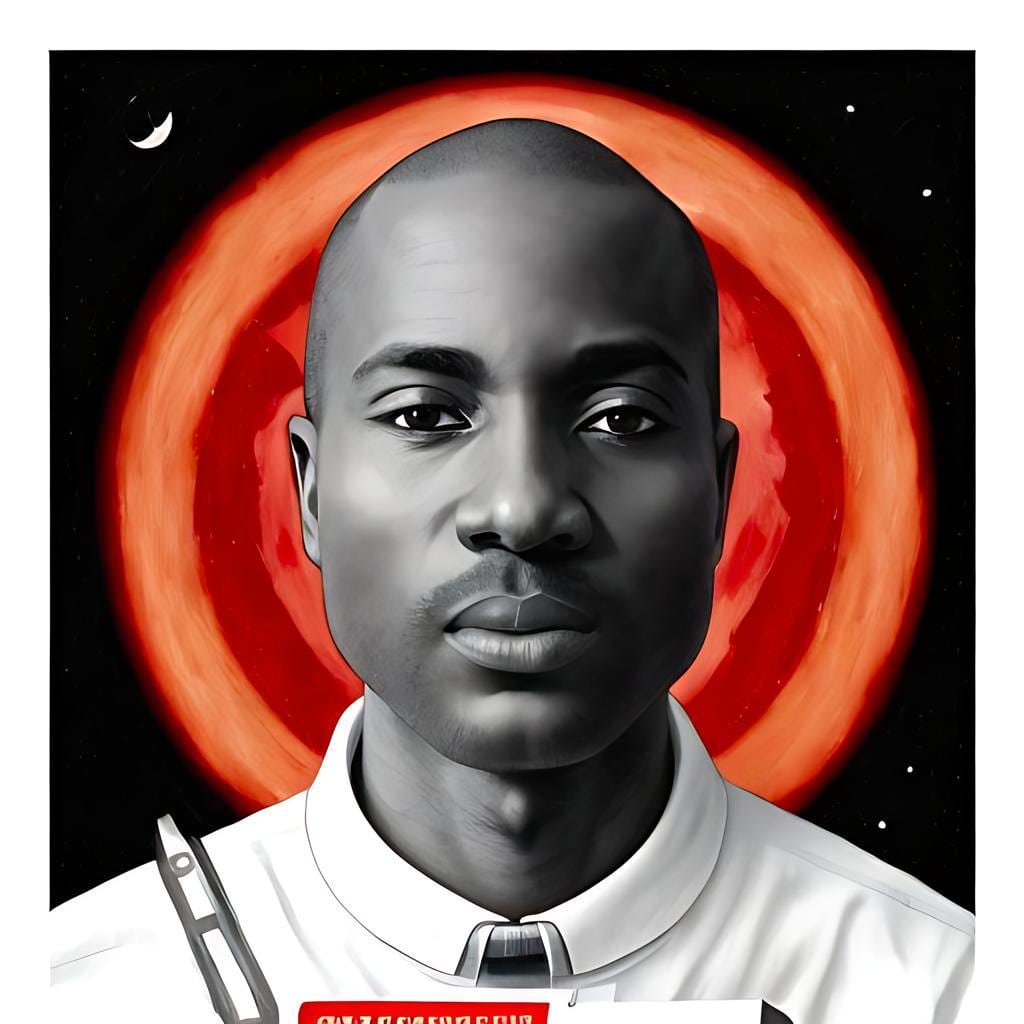

In [16]:
from PIL import Image
img = Image.open('selfa.jpg')
img

In [20]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')
prompt = 'What is in this image?'
message = HumanMessage(
    content=[
        {'type': 'text', 'text':prompt},
        {'type':'image_url', 'image_url':img}
    ]
)
response = llm.invoke([message])
print(response.content)

ImportError: PIL is required to load images. Please install it with `pip install pillow`

In [21]:
pip install -q requests

Note: you may need to restart the kernel to use updated packages.


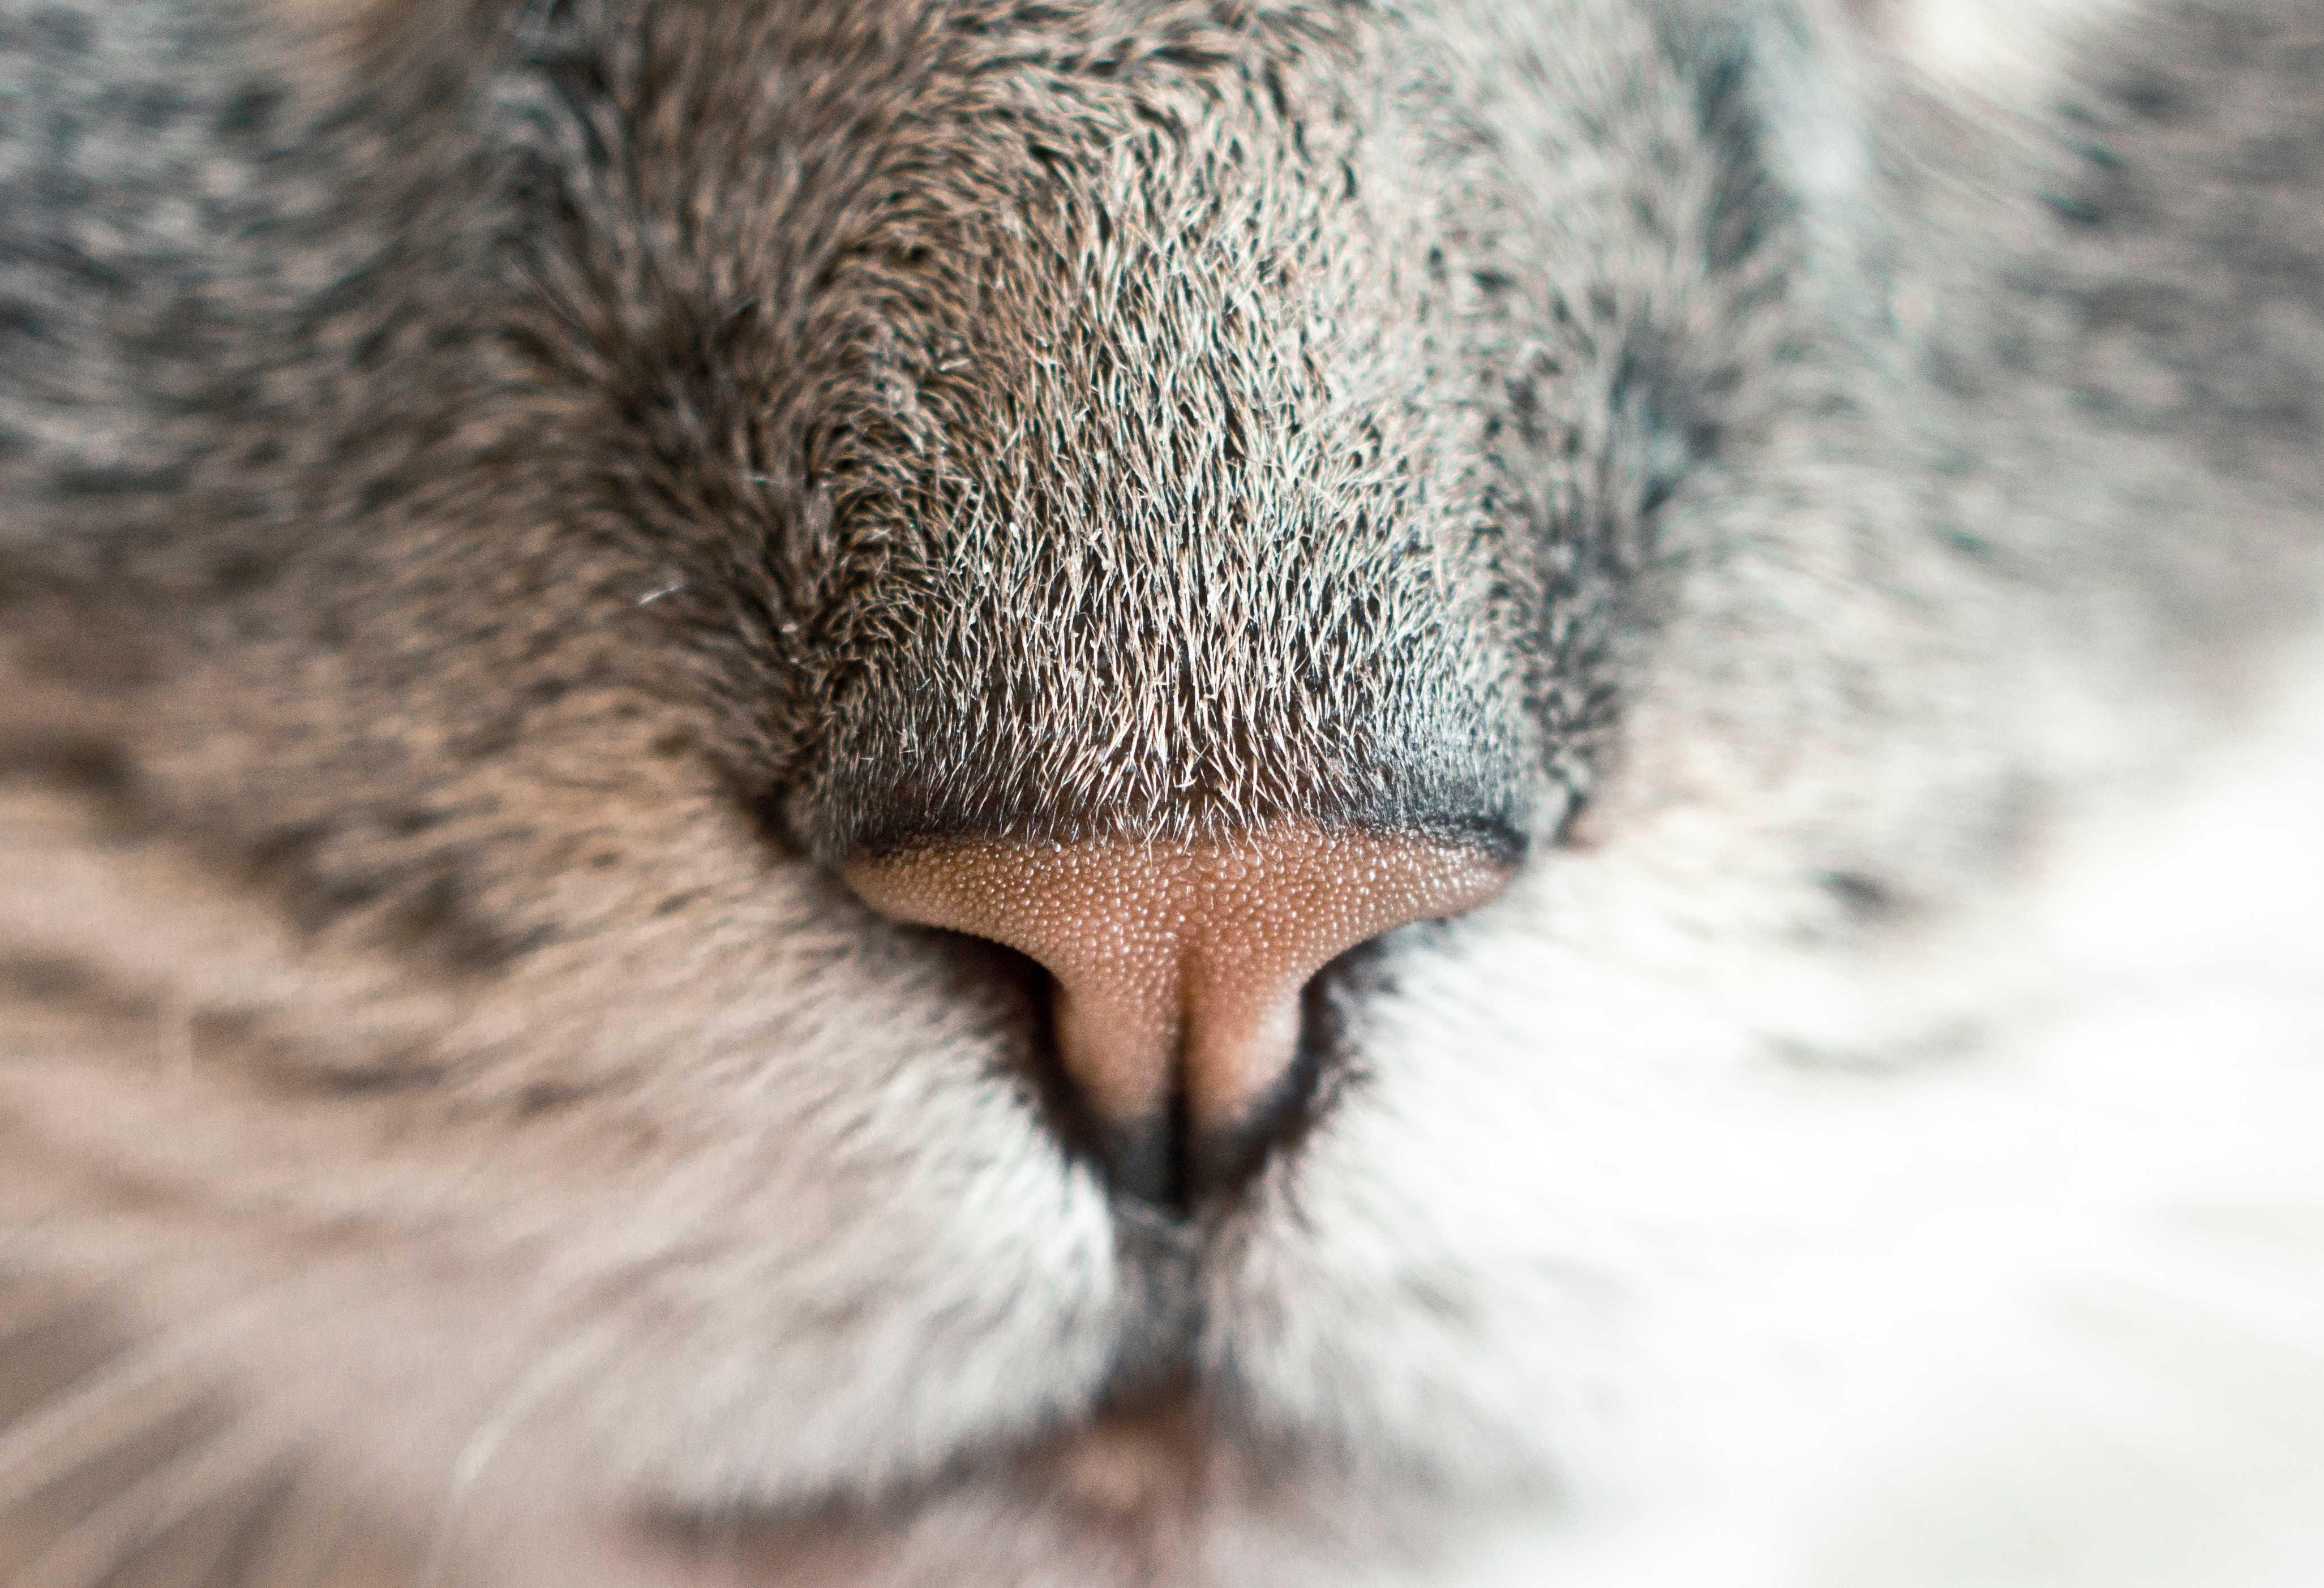

In [22]:
import requests
from IPython.display import Image
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content
image_data = Image(content)
image_data